# **Regular FBA vs Secretory FBA**

* Computed in Jabba over all 5641 secretory proteins in CHO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cobra
from IPython.display import display
%matplotlib inline

In [2]:
data = pd.read_csv('DATA/NB5_compareFBA_results.csv', header=0)
psim = pd.read_csv('iCHO2048s_python/PSIM_CHO.tab', sep='\t', header=0)

In [3]:
display(data.head())

,Entry,secretoryFBA,regularFBA
0,A0A061HTA7,0.000275,0.000254
1,A0A061HTB1,0.000165,0.000165
2,A0A061HTB2,0.000110,0.000110
3,A0A061HTB3,0.000927,0.000927
4,A0A061HTB8,0.000376,0.000351


### Generate KDE plots to compare FBA predicted by regular FBA (with iCHO1766) and secretory FBA (with iCHO2048s)

Text(0, 0.5, 'Counts')

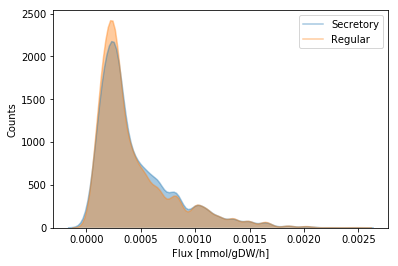

In [3]:
sns.kdeplot(data['secretoryFBA'].values, shade=True, alpha=0.4, label='Secretory')
sns.kdeplot(data['regularFBA'].values, shade=True, alpha=0.4, label='Regular')
plt.xlabel('Flux [mmol/gDW/h]')
plt.ylabel('Counts')

### Label proteins with different FBA fluxes

In [4]:
# Compute differences in %
fba_differences = []
for i in range(len(data)):
    reg = data['regularFBA'][i]
    sec = data['secretoryFBA'][i]
    if reg == 0 or sec == 0:
        fba_differences.append(0)
    else:
        fba_differences.append((sec/reg - 1)*100.0)
# Add column to data
data['fba_differences'] = fba_differences

# Boolean variable for labeling proteins with different FBAs
secretory_different = []
thr = 0.15
for i in range(len(data)):
    reg = data['regularFBA'][i]
    sec = data['secretoryFBA'][i]
    if abs(sec/reg - 1) >= thr: # If FBAs are at least thr% different
        secretory_different.append(True)
    else:
        secretory_different.append(False)
# Add column to data
data['secretory_different'] = secretory_different

### Plot distribution of FBA differences

Text(0.5, 1.0, 'Distribution of FBA differences')

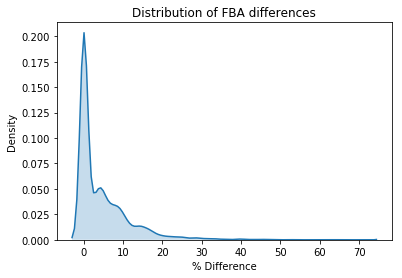

In [5]:
sns.kdeplot(data['fba_differences'].values, shade=True)
plt.xlabel('% Difference')
plt.ylabel('Density')
plt.title('Distribution of FBA differences')

### How many proteins had a difference in flux?

In [6]:
print('{}/{} proteins (or {}%) had a difference of at least {}%'.format(sum(data['secretory_different']),len(data),\
                                                                    round(sum(data['secretory_different'])/len(data)*100,2),\
                                                              thr*100))

454/5641 proteins (or 8.05%) had a difference of at least 15.0%


### Investigate how post-translational modifications vary across proteins with different FBA fluxes

In [7]:
data = pd.merge(data, psim.iloc[:,[0,2,3,5,6,7,8,9,10]], on='Entry')

In [8]:
data.head()

,Entry,secretoryFBA,regularFBA,fba_differences,secretory_different,Length,Mass,DSB,GPI,NG,OG,TMD,Location
0,A0A061HTA7,0.000275,0.000254,8.333333e+00,False,307,33884.0,0,0,0,0,0,NaN
1,A0A061HTB1,0.000165,0.000165,-6.661338e-14,False,592,67636.0,0,0,0,0,0,NaN
2,A0A061HTB2,0.000110,0.000110,-3.330669e-14,False,914,105105.0,0,0,0,0,0,NaN
3,A0A061HTB3,0.000927,0.000927,-5.551115e-14,False,82,8843.0,0,1,0,0,0,NaN
4,A0A061HTB8,0.000376,0.000351,7.407407e+00,False,247,27490.0,0,0,0,0,0,NaN


### Location

In [9]:
display(pd.crosstab(index=data['Location'], columns=data['secretory_different'], normalize='columns'))

secretory_different,False,True
Location,,
[c],0.002030,0.000000
[e],0.159391,0.200000
[g],0.000000,0.007407
[gm],0.000000,0.133333
[im],0.001015,0.000000
[l],0.002030,0.000000
[m],0.005076,0.014815
[mm],0.001015,0.000000
[n],0.022335,0.014815


### Post-translational modifications

Length
Orange bar is most common bin


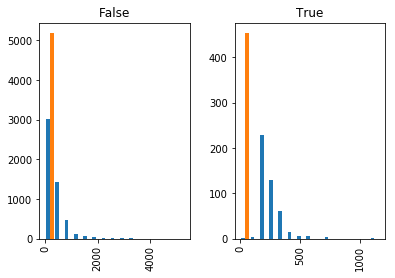

Mass
Orange bar is most common bin


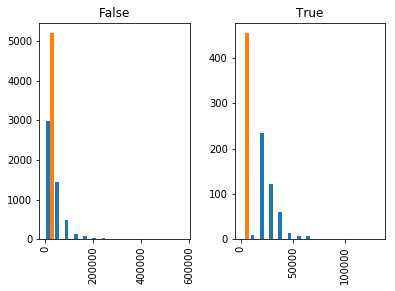

DSB
Orange bar is most common bin


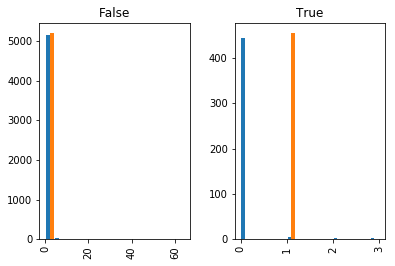

GPI
Orange bar is most common bin


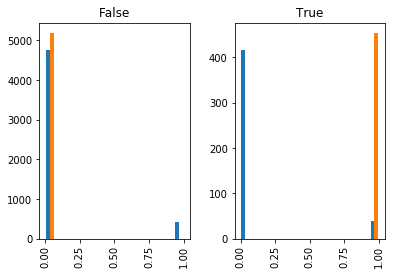

NG
Orange bar is most common bin


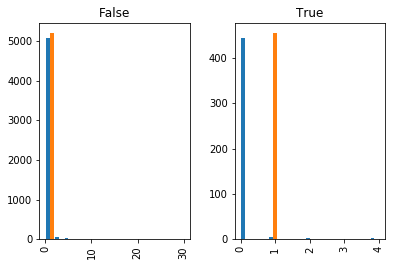

OG
Orange bar is most common bin


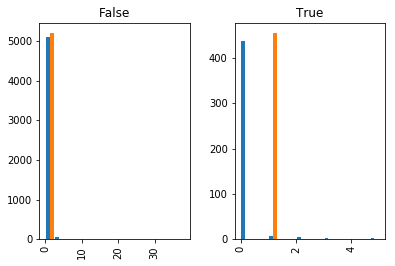

TMD
Orange bar is most common bin


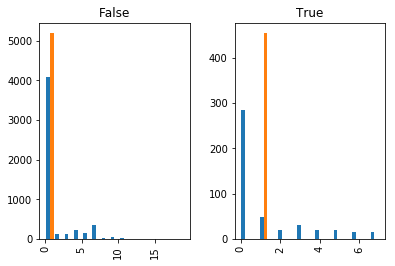

In [10]:
for column in list(data.columns)[5:12]:
    print(column)
    print("Orange bar is most common bin")
    hist = data[[column, 'secretory_different']].hist(by='secretory_different', bins=15)
    plt.show()

In [11]:
display(pd.crosstab(index=data['Length'], columns=data['secretory_different'], normalize='columns'))
display(pd.crosstab(index=data['GPI'], columns=data['secretory_different'], normalize='columns'))
display(pd.crosstab(index=data['DSB'], columns=data['secretory_different'], normalize='columns'))
display(pd.crosstab(index=data['NG'], columns=data['secretory_different'], normalize='columns'))
display(pd.crosstab(index=data['OG'], columns=data['secretory_different'], normalize='columns'))

secretory_different,False,True
Length,,
50,0.004434,0.000000
51,0.001735,0.000000
52,0.004820,0.000000
53,0.003663,0.000000
54,0.003856,0.000000
55,0.004049,0.000000
56,0.003470,0.000000
57,0.003085,0.002203
58,0.003470,0.000000


secretory_different,False,True
GPI,,
0,0.917486,0.9163
1,0.082514,0.0837


secretory_different,False,True
DSB,,
0,0.969539,0.975771
1,0.007712,0.011013
2,0.004820,0.006608
3,0.005013,0.006608
4,0.003663,0.000000
5,0.001350,0.000000
6,0.002121,0.000000
7,0.000771,0.000000
8,0.001157,0.000000


secretory_different,False,True
NG,,
0,0.970696,0.980176
1,0.009639,0.008811
2,0.004434,0.004405
3,0.003856,0.002203
4,0.003085,0.004405
5,0.001542,0.000000
6,0.000964,0.000000
7,0.001735,0.000000
8,0.000193,0.000000


secretory_different,False,True
OG,,
0,0.957393,0.962555
1,0.015616,0.015419
2,0.008483,0.011013
3,0.004241,0.004405
4,0.002892,0.002203
5,0.003085,0.004405
6,0.001735,0.000000
7,0.001157,0.000000
8,0.000771,0.000000


# To do:

Run Hypergeometric test to compare [pm] proteins.
* Fraction of cytosolic (True VS False)
* Fraction of Golgi (True VS False)
* DSB
* NG

Run Rank Sum test on the continuous features.
* Length
* Mass

Compare protein classes (32 in total) across True and False

Make a figure of a cell with enriched compartments highlighted

# Hypergeometric test
- Population size = Number of secreted proteins in dataset
- Number of successes in population = Number of secreted proteins with different FBA flux
- Sample size = Number of secreted proteins in compartment [?]
- Number of successes in sample = Number of secreted proteins in compartment [?] and with different FBA fluxes

In [12]:
from scipy.stats import hypergeom

# Test by location

In [13]:
# Parameters
locations = list(set(list(data['Location'])))[1:]
significant_locations = []
cutoff = 0.05
# Population
P = len(data)
# Successes in population
S = sum(data['secretory_different'])
for location in locations:
    print("###\nHypergeomtric Test with Location={}".format(location))
    # Sample size
    tmp = data[data['Location']==location].copy().reset_index(drop=True)
    s = len(tmp)
    # Calculate successes in sample
    n = sum(tmp['secretory_different'])
    # Run Hypergeometric test
    print('Population size: ' + str(P))
    print('Successes in Population: ' + str(S))
    print('Sample size: ' + str(s))
    print('Successes in sample: ' + str(n))
    p_greater = hypergeom.cdf(n ,P,S,s)
    p_less = hypergeom.sf(n - 1,P,S,s)
    print('p-value n <= ' + str(n) + ': \n' + str(p_greater))
    print('p-value n >= ' + str(n) + ': \n' + str(p_less))
    if p_less <= cutoff:
        print("SIGNIFICANT!")
        significant_locations.append(location)
    else:
        print("NOT SIGNIFICANT...")
    print('###\n\n###')
print("The cellular compartments enriched (p-value<={}) for differential FBAs are:{}".format(cutoff,significant_locations))

###
Hypergeomtric Test with Location=[e]
Population size: 5641
Successes in Population: 454
Sample size: 184
Successes in sample: 27
p-value n <= 27: 
0.9993124208756242
p-value n >= 27: 
0.0014943361991158208
SIGNIFICANT!
###

###
###
Hypergeomtric Test with Location=[n]
Population size: 5641
Successes in Population: 454
Sample size: 24
Successes in sample: 2
p-value n <= 2: 
0.6962374123711186
p-value n >= 2: 
0.5866312789742384
NOT SIGNIFICANT...
###

###
###
Hypergeomtric Test with Location=[r]
Population size: 5641
Successes in Population: 454
Sample size: 28
Successes in sample: 3
p-value n <= 3: 
0.8156974872148333
p-value n >= 3: 
0.394468832721665
NOT SIGNIFICANT...
###

###
###
Hypergeomtric Test with Location=[gm]
Population size: 5641
Successes in Population: 454
Sample size: 18
Successes in sample: 18
p-value n <= 18: 
1.0
p-value n >= 18: 
1.4659201064499852e-20
SIGNIFICANT!
###

###
###
Hypergeomtric Test with Location=[mm]
Population size: 5641
Successes in Population: 

# Test by PTM

In [14]:
# Parameters
ptms = ['DSB', 'GPI', 'NG', 'OG', 'TMD']
significant_ptms = []
cutoff = 0.05
# Population
P = len(data)
# Successes in population
S = sum(data['secretory_different'])
for ptm in ptms:
    print("###\nHypergeomtric Test with PTM={}".format(ptm))
    # Sample size
    tmp = data[data[ptm]>0].copy().reset_index(drop=True)
    s = len(tmp)
    # Calculate successes in sample
    n = sum(tmp['secretory_different'])
    # Run Hypergeometric test
    print('Population size: ' + str(P))
    print('Successes in Population: ' + str(S))
    print('Sample size: ' + str(s))
    print('Successes in sample: ' + str(n))
    p_greater = hypergeom.cdf(n ,P,S,s)
    p_less = hypergeom.sf(n - 1,P,S,s)
    print('p-value n <= ' + str(n) + ': \n' + str(p_greater))
    print('p-value n >= ' + str(n) + ': \n' + str(p_less))
    if p_less <= cutoff:
        print("SIGNIFICANT!")
        significant_ptms.append(ptm)
    else:
        print("NOT SIGNIFICANT...")
    print('###\n\n###')
print("The post-translational modifications enriched (p-value<={}) for differential FBAs are:{}".format(cutoff,significant_ptms))

###
Hypergeomtric Test with PTM=DSB
Population size: 5641
Successes in Population: 454
Sample size: 169
Successes in sample: 11
p-value n <= 11: 
0.281436676016135
p-value n >= 11: 
0.8115140426648773
NOT SIGNIFICANT...
###

###
###
Hypergeomtric Test with PTM=GPI
Population size: 5641
Successes in Population: 454
Sample size: 466
Successes in sample: 38
p-value n <= 38: 
0.5780898352252408
p-value n >= 38: 
0.4920239950194779
NOT SIGNIFICANT...
###

###
###
Hypergeomtric Test with PTM=NG
Population size: 5641
Successes in Population: 454
Sample size: 161
Successes in sample: 9
p-value n <= 9: 
0.15386955414996883
p-value n >= 9: 
0.9109041252695305
NOT SIGNIFICANT...
###

###
###
Hypergeomtric Test with PTM=OG
Population size: 5641
Successes in Population: 454
Sample size: 238
Successes in sample: 17
p-value n <= 17: 
0.3534108383357508
p-value n >= 17: 
0.734933430970134
NOT SIGNIFICANT...
###

###
###
Hypergeomtric Test with PTM=TMD
Population size: 5641
Successes in Population: 454

# Wilcoxon Rank-sum test

In [15]:
from scipy.stats import ranksums

# Test by length

In [16]:
x = data[data['secretory_different']==True].copy().reset_index(drop=True)
x = x['Length'].values
y = data[data['secretory_different']==False].copy().reset_index(drop=True)
y = y['Length'].values
ranksums(x,y)

RanksumsResult(statistic=-8.312663634398985, pvalue=9.357748398406237e-17)

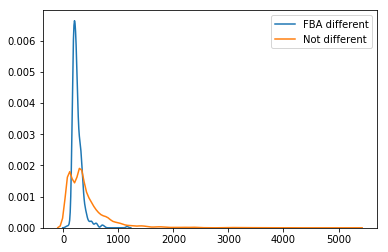

In [17]:
sns.kdeplot(x, label='FBA different')
sns.kdeplot(y, label='Not different')
plt.legend()

# Test by mass

In [18]:
x = data[data['secretory_different']==True].copy().reset_index(drop=True)
x = x['Mass'].values
y = data[data['secretory_different']==False].copy().reset_index(drop=True)
y = y['Mass'].values
ranksums(x,y)

RanksumsResult(statistic=-8.295398177934914, pvalue=1.0822209005501616e-16)

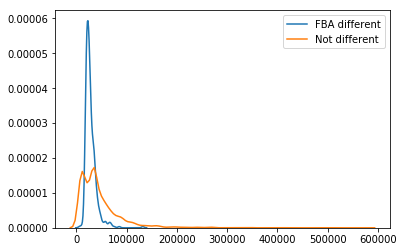

In [19]:
sns.kdeplot(x, label='FBA different')
sns.kdeplot(y, label='Not different')
plt.legend()

# Generate secretory categories

In [35]:
categories = []
for i in range(len(data)):
    c = ''
    if data['DSB'][i] > 0:
        c = c + 'D'
    if data['GPI'][i] > 0:
        c = c + 'G'
    if data['NG'][i] > 0:
        c = c + 'N'
    if data['OG'][i] > 0:
        c = c + 'O'
    if data['TMD'][i] > 0:
        c = c + 'T'
    if c == '': # If protein has no PTMs
        c = 'S'
    if str(data['Location'][i]) != 'nan':
        c = c + str(data['Location'][i])
    categories.append(c)
data['Category'] = categories

# Test by category

In [40]:
# Parameters
cats = list(set(categories))
significant_categories = []
cutoff = 0.05
# Population
P = len(data)
# Successes in population
S = sum(data['secretory_different'])
for cat in cats:
    # Sample size
    tmp = data[data['Category']==cat].copy().reset_index(drop=True)
    s = len(tmp)
    # Calculate successes in sample
    n = sum(tmp['secretory_different'])
    # Run Hypergeometric test
    p_greater = hypergeom.cdf(n ,P,S,s)
    p_less = hypergeom.sf(n - 1,P,S,s)
    if p_less <= cutoff:     # Only print if significant
        print("###\nHypergeomtric Test with Category={}".format(cat))
        significant_categories.append(cat)
        print('Population size: ' + str(P))
        print('Successes in Population: ' + str(S))
        print('Sample size: ' + str(s))
        print('Successes in sample: ' + str(n))
        print('p-value n <= ' + str(n) + ': \n' + str(p_greater))
        print('p-value n >= ' + str(n) + ': \n' + str(p_less))
        print("SIGNIFICANT!")
        print('###\n\n###')
print("The protein categories enriched (p-value<={}) for differential FBAs are:{}".format(cutoff,significant_categories))

###
Hypergeomtric Test with Category=S[r]
Population size: 5641
Successes in Population: 454
Sample size: 7
Successes in sample: 3
p-value n <= 3: 
0.9988092163836576
p-value n >= 3: 
0.014181937827857424
SIGNIFICANT!
###

###
###
Hypergeomtric Test with Category=T[pm]
Population size: 5641
Successes in Population: 454
Sample size: 586
Successes in sample: 61
p-value n <= 61: 
0.9872402904169769
p-value n >= 61: 
0.01859262310340404
SIGNIFICANT!
###

###
###
Hypergeomtric Test with Category=S[e]
Population size: 5641
Successes in Population: 454
Sample size: 129
Successes in sample: 17
p-value n <= 17: 
0.9855021672828971
p-value n >= 17: 
0.028637378795184257
SIGNIFICANT!
###

###
###
Hypergeomtric Test with Category=S[gm]
Population size: 5641
Successes in Population: 454
Sample size: 5
Successes in sample: 5
p-value n <= 5: 
1.0
p-value n >= 5: 
3.3088047510920123e-06
SIGNIFICANT!
###

###
###
Hypergeomtric Test with Category=DT[gm]
Population size: 5641
Successes in Population: 454